## Preprocessing

In [197]:
import numpy as np
import pandas as pd

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [199]:
url = '/Users/arpanganguli/Documents/Professional/Analysis/ISLR/Datasets/USArrests.csv'
USArrests = pd.read_csv(url, index_col='Unnamed: 0')
USArrests.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


***

## Comparing measures

In [200]:
from sklearn.preprocessing import scale

In [201]:
import warnings
warnings.filterwarnings('ignore')
df = pd.DataFrame(scale(USArrests))
df.columns = USArrests.columns
df.head()

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


In [204]:
df.describe().round(4)

,Murder,Assault,UrbanPop,Rape
count,50.0000,50.0000,50.0000,50.0000
mean,-0.0000,0.0000,-0.0000,0.0000
std,1.0102,1.0102,1.0102,1.0102
min,-1.6207,-1.5244,-2.3407,-1.5025
25%,-0.8611,-0.7486,-0.7705,-0.6640
50%,-0.1248,-0.1425,0.0321,-0.1221
75%,0.8029,0.9484,0.8521,0.5331
max,2.2293,2.0150,1.7768,2.6712


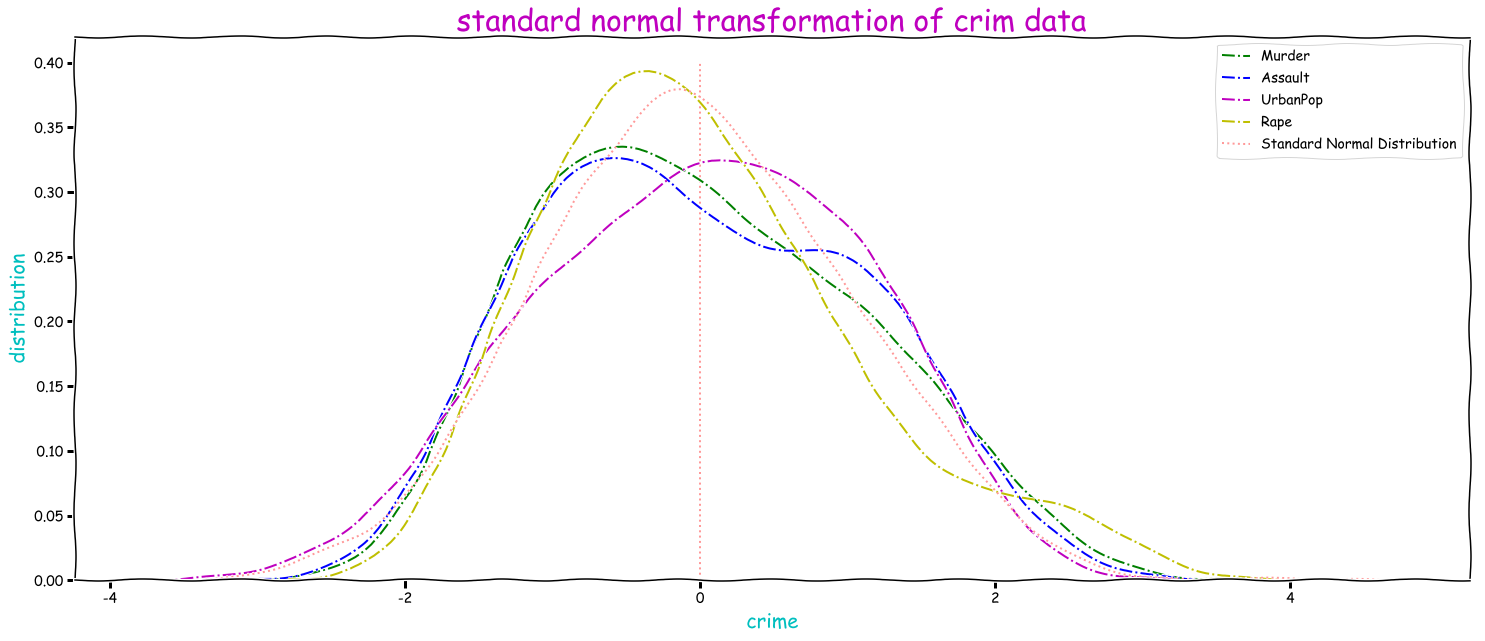

In [205]:
plt.xkcd()
plt.figure(figsize=(25, 10))
sns.distplot(df.Murder, bins=30, kde_kws={'color': 'g', 'ls': '-.'}, hist=False, label='Murder')
sns.distplot(df.Assault, bins=30, kde_kws={'color': 'b', 'ls': '-.'}, hist = False, label='Assault')
sns.distplot(df.UrbanPop, bins=30, kde_kws={'color': 'm', 'ls': '-.'}, hist=False, label='UrbanPop')
sns.distplot(df.Rape, bins=30, kde_kws={'color': 'y', 'ls': '-.'}, hist=False, label='Rape')
plt.vlines(x=0, ymin=0.00, ymax=0.40, color='r', linestyles='dotted', alpha=0.4)
sns.distplot(np.random.normal(loc=0,scale=1,size=1000), kde_kws={'color': 'r', 'ls': 'dotted', 'alpha': 0.4}, hist=False, label='Standard Normal Distribution')
plt.xlabel('crime', fontsize=20, color='c')
plt.ylabel('distribution', fontsize=20, color='c')
plt.title('standard normal transformation of crim data', fontsize=30, color='m')
plt.legend()

In [206]:
corrdf = pd.DataFrame()

for i in df.index.values:
    for j in df.index.values:
        cor = 1 - np.correlate(df.iloc[i], df.iloc[j])
        corrdf = corrdf.append(pd.DataFrame([cor]))

corrdf.columns = ['corr']
corrdf.reset_index(drop=True, inplace=True)
corrdf.head()

,corr
0,-1.477713
1,-1.163515
2,0.262514
3,-0.050321
4,0.580564


In [186]:
eucldf = pd.DataFrame()

for i in df.index.values:
    for j in df.index.values:
        eucl = (np.linalg.norm(df.iloc[j] - df.iloc[i]))**2
        eucldf = eucldf.append(pd.DataFrame([eucl]))

eucldf.columns = ['eucl']
eucldf.reset_index(drop=True, inplace=True)
eucldf.head()

,eucl
0,0.000000
1,7.459476
2,5.367584
3,1.697562
4,10.865193


In [187]:
maindf = pd.concat([corrdf, eucldf], axis=1)
maindf.head()

,corr,eucl
0,-1.477713,0.000000
1,-1.163515,7.459476
2,0.262514,5.367584
3,-0.050321,1.697562
4,0.580564,10.865193


In [188]:
maindf['ratio'] = maindf['corr'] / maindf['eucl']
maindf.head()

,corr,eucl,ratio
0,-1.477713,0.000000,-inf
1,-1.163515,7.459476,-0.155978
2,0.262514,5.367584,0.048907
3,-0.050321,1.697562,-0.029643
4,0.580564,10.865193,0.053433


In [189]:
rows_max = maindf.loc[maindf.ratio==maindf.ratio.max()]
rows_max

,corr,eucl,ratio
663,0.489188,0.0,inf
765,0.248698,0.0,inf
1224,0.251671,0.0,inf
1734,0.172456,0.0,inf
1785,0.819590,0.0,inf
2295,0.906011,0.0,inf
2499,0.415083,0.0,inf


In [190]:
maindf.drop(rows_max.index.values, inplace=True)

In [191]:
maindf.loc[maindf.ratio==maindf.ratio.max()]

,corr,eucl,ratio
1795,1.025454,0.325308,3.152257
2285,1.025454,0.325308,3.152257


In [192]:
rows_min = maindf.loc[maindf.ratio==maindf.ratio.min()]
rows_min

,corr,eucl,ratio
0,-1.477713,0.0,-inf
51,-8.308793,0.0,-inf
102,-3.364844,0.0,-inf
153,-0.320491,0.0,-inf
204,-8.226353,0.0,-inf
255,-3.468208,0.0,-inf
306,-2.459502,0.0,-inf
357,-0.402452,0.0,-inf
408,-8.421966,0.0,-inf
459,-4.599713,0.0,-inf


In [193]:
maindf.drop(rows_min.index.values, inplace=True)

In [194]:
maindf.loc[maindf.ratio==maindf.ratio.min()]

,corr,eucl,ratio
728,-4.379866,0.043241,-101.290549
1414,-4.379866,0.043241,-101.290549


*It is alright to remove ratios with inf of -inf because they denote division by 0. This suggests that the deleted rows essentially are calculating correlations for the same state, which is not required.*

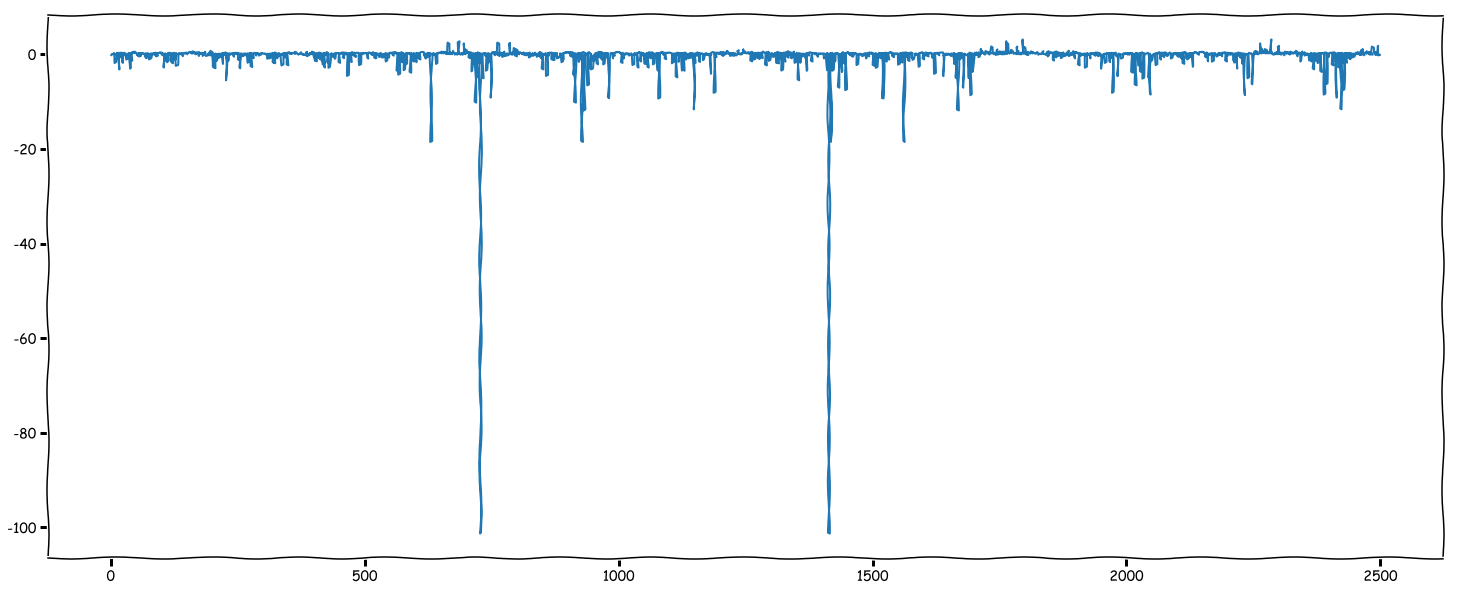

In [195]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.plot(maindf.ratio)

In [196]:
maindf['ratio'].describe().round(2)

count    2450.00
mean       -0.26
std         3.22
min      -101.29
25%        -0.07
50%         0.18
75%         0.28
max         3.15
Name: ratio, dtype: float64

**Therefore, with an exception of a couple of values, the two measures are similar on an average.**